In [13]:
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor
import time 
import matplotlib.pyplot as plt

In [9]:
trainData = pd.read_csv("train.csv")
testData = pd.read_csv("test.csv")

In [16]:
trainData.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [10]:
del trainData["Id"],testData["Id"] 

trainPrices = trainData["SalePrice"].to_numpy()

del trainData["SalePrice"],trainData["Alley"],testData["Alley"]

print(trainData.shape,testData.shape)
#trainData.replace(np.nan, 0,inplace = True)
#testData.replace(np.nan, 0,inplace = True)

(1460, 78) (1459, 78)


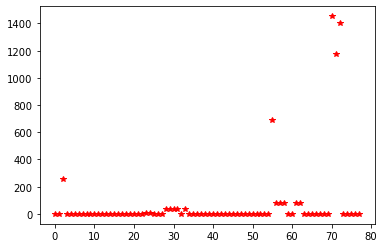

In [15]:
numNC = trainData.isnull().sum().to_numpy()
plt.plot(numNC,"r*")

In [17]:
trainData.drop(trainData.columns[np.where(numNC > 200)],axis =1 ,inplace =  True)
testData.drop(testData.columns[np.where(numNC > 200)],axis =1 ,inplace =  True)

In [18]:
s=time.time()
numNR = trainData.isnull().sum()
print(np.sum(numNR.to_numpy()))
mostCommons = trainData.value_counts().idxmax()
counter = 0
for i in range(trainData.shape[0]):
    numNR = trainData.loc[i].isnull().sum()
    nullFeatures = trainData.loc[i].isnull().to_numpy()
    if numNR > 0:
        curPrice = trainPrices[i]
        priceDif = abs(trainPrices-curPrice)
        #closestIndex = np.where(priceDif == np.min(priceDif))
        closestIndex = np.where(priceDif < curPrice*0.1)
        for j in range(nullFeatures.shape[0]):
            if nullFeatures[j] == True:
                rowss=trainData.loc[closestIndex].iloc[:,j]
                rowss.dropna( inplace=True)
                if rowss.shape[0] >0:
                    if rowss.dtype != object:
                        meann = np.mean(rowss)
                        trainData.iloc[i,j] = meann
                        counter = counter+1
                    else:
                        npIsEasier = rowss.to_numpy()
                        maxOccur = np.argmax(npIsEasier)
                        trainData.iloc[i,j] = npIsEasier[maxOccur]
                        counter = counter+1
                else:
                    trainData.iloc[i,j] = mostCommons[j]
numNR = trainData.isnull().sum()
print(np.sum(numNR.to_numpy()))
print(time.time()-s)  

609
0
0.5448958873748779


In [19]:
numNR = testData.isnull().sum()
print(np.sum(numNR.to_numpy()))
counter = 0
mostCommons = trainData.value_counts().idxmax()
for i in range(testData.shape[0]):
    numNR = testData.loc[i].isnull().sum()
    nullFeatures = testData.loc[i].isnull().to_numpy()
    if numNR > 0:
        for j in range(nullFeatures.shape[0]):
            if nullFeatures[j] == True:
                testData.iloc[i,j] = mostCommons[j]
numNR = testData.isnull().sum()
print(np.sum(numNR.to_numpy()))

658
0


In [20]:
allData = pd.concat([trainData,testData])

In [21]:
allData.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal


In [22]:
col_names = list(allData.columns.values)
encodePlz = [ col  for col, dt in allData.dtypes.items() if dt == object]

dummies = pd.get_dummies(allData[encodePlz], prefix=encodePlz,drop_first = True)
allData= allData.drop(encodePlz,axis=1)

In [23]:
allData = pd.concat([allData,dummies],axis=1)

In [24]:
allData.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,0,1,0,0,0,1,0
